# WARNING
Clean notebook before pushing to Github. 
In the menu: Cell -> All Output -> Clear

# 1. Ready?

## Dreams loading

## Brainwaves loading

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mne

In [8]:
path_to_file = '../data/raw/EEG/Nathalie-78_20171118_123017.mff'

Reading EGI MFF Header from ../data/raw/EEG/Nathalie-78_20171118_123017.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
The following EEG sensors did not have a position specified in the selected montage: ['E257']. Their position has been left untouched.
Reading 0 ... 9104429  =      0.000 ... 36417.716 secs...


<ipython-input-9-b5b53c3d4be8>:3: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['E257']. Their position has been left untouched.
  preload=True)


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


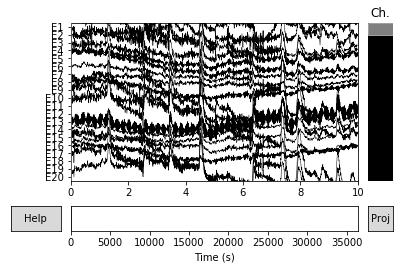

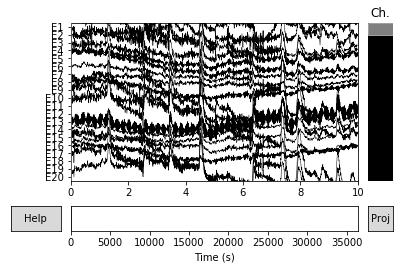

In [ ]:
raw = mne.io.read_raw_egi(path_to_file,
                          montage='GSN-HydroCel-256',
                          preload=True)
raw.set_eeg_reference('average', projection=True)
raw.plot(block=True, lowpass=40, highpass=0.1)

In [ ]:
raw.crop?

# 2. Steady...

## EEG Preprocessing

In [ ]:
from autoreject import LocalAutoRejectCV, compute_thresholds
import numpy as np
np.random.seed(42)

In [ ]:
events_ar = mne.event.make_fixed_length_events(
            raw, id=9999, start=0, stop=None, duration=1.0,
            first_samp=True)
epochs_ar = mne.epochs.Epochs(raw, events_ar, tmin=0, tmax=1.0,
                              baseline=None, preload=True)
epochs_ar.decimate(4)

In [ ]:
thresh_func = partial(compute_thresholds, random_state=42, n_jobs=8)
ar = LocalAutoRejectCV(thresh_func=thresh_func, verbose=False)

index = np.random.choice(np.arange(len(epochs_ar)),
                         size=int(np.floor(len(epochs_ar) * 0.1)),
                         replace=False)
ar.fit(epochs_ar[index])

In [ ]:
epochs_clean, rl = ar.transform(epochs_ar, return_log=True)

print("{:.2f}% epochs rejected (N={})".format(
      epochs_clean.drop_log_stats(), len(epochs_clean)))